In [14]:
import numpy as np
import matplotlib.pyplot as plt

import pyabc



def model(p):
    return {'s0': p['p0'] + 0.1 * np.random.normal(),
            's1': p['p1'] + 1 * np.random.normal()}

def model(p):
    return {'s0': p['p0']**2 + 0.01 * np.random.normal(),
            's1': p['p1']**2 + 1 * np.random.normal(),
            's2':  5 + 0.01 * np.random.normal()}

def model3(p):
    return {'s0': p['p0']**2 + 0.01 * np.random.normal(),
            's1': p['p1']**2 + 1 * np.random.normal(),
            's2': 5 + 10 * np.random.normal(size=10),
            's3': 5 + 0.001 * np.random.normal(),
            's4': p['p1'] * p['p2'] + 0.1 * np.random.normal()}

prior = pyabc.Distribution(p0=pyabc.RV('uniform', 0, 10),
                           p1=pyabc.RV('uniform', 0, 10))

obs = {'s0': 4, 's1': 6, 's2': 5}

db_path = pyabc.create_sqlite_db_id(file_="ss.db")

def plot_history(history):
    fig, ax = plt.subplots(1,2)
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=10,
                                        x='p0', ax=ax[0],
                                        label="PDF t={}".format(t))
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=10,
                                        x='p1', ax=ax[1],
                                        label="PDF t={}".format(t))
    ax[0].axvline(4, color='k', linestyle='dashed', label="True value")
    ax[1].axvline(6, color='k', linestyle='dashed', label="True value")
    ax[1].legend()

prior3 = pyabc.Distribution(p0=pyabc.RV('uniform', 0, 10),
                           p1=pyabc.RV('uniform', 0, 100),
                           p2=pyabc.RV('uniform', 0, 10))
obs3 = {'s0': 4, 's1': 2500, 's2': np.array([5]*10), 's3': 5, 's4': 150}

def plot_history3(history):
    fig, ax = plt.subplots(1,3)
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=10,
                                        x='p0', ax=ax[0],
                                        label="PDF t={}".format(t))
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=100,
                                        x='p1', ax=ax[1],
                                        label="PDF t={}".format(t))
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=10,
                                        x='p2', ax=ax[2],
                                        label="PDF t={}".format(t))
    ax[0].axvline(2, color='k', linestyle='dashed', label="True value")
    ax[1].axvline(50, color='k', linestyle='dashed', label="True value")
    ax[2].axvline(3, color='k', linestyle='dashed', label="True value")
    ax[1].legend()

model, obs, prior, plot_history = model3, obs3, prior3, plot_history3

In [ ]:
import tensorflow as tf

tfmodel = tf.keras.models.Sequential()
tfmodel.add(tf.keras.layers.Dense(6, input_dim=3, activation='relu'))
tfmodel.add(tf.keras.layers.Dense(4, activation='relu'))
tfmodel.add(tf.keras.layers.Dense(2, activation='relu'))
tfmodel.compile(loss='mean_squared_error', optimizer='adam')

distance = pyabc.britney.AdaptiveEuclidean(pyabc.britney.PredictorBritney(tfmodel))

abc = pyabc.ABCSMC(model, prior, distance)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=84, start_time=2021-02-27 12:12:08.429160>
INFO:ABC:Calibration sample t=-1.


[   4 2500    5    5    5    5    5    5    5    5    5    5    5  150]


INFO:Epsilon:initial epsilon is 13.253153768921129
INFO:ABC:t: 0, eps: 13.253153768921129.
INFO:ABC:Acceptance rate: 500 / 920 = 5.4348e-01, ESS=5.0000e+02.
INFO:ABC:t: 1, eps: 14.516336936382377.
INFO:ABC:Acceptance rate: 500 / 1464 = 3.4153e-01, ESS=4.2193e+02.
INFO:ABC:t: 2, eps: 14.623607632890614.
INFO:ABC:Acceptance rate: 500 / 2408 = 2.0764e-01, ESS=4.4010e+02.
INFO:ABC:t: 3, eps: 14.73491360778029.
INFO:ABC:Acceptance rate: 500 / 3988 = 1.2538e-01, ESS=4.1444e+02.
INFO:ABC:t: 4, eps: 14.613389386133822.
INFO:ABC:Acceptance rate: 500 / 6088 = 8.2129e-02, ESS=4.2850e+02.
INFO:pyabc.util:Stopping: minimum acceptance rate.
INFO:History:Done <ABCSMC id=84, duration=0:00:16.893299, end_time=2021-02-27 12:12:25.322459>


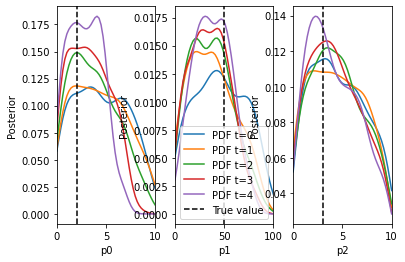

In [17]:
#distance = pyabc.PNormDistance()
distance = pyabc.britney.AdaptiveEuclidean(pyabc.britney.IdentityBritney(), adaptive=True, scale_function=pyabc.britney.scale.root_mean_square_deviation)

abc = pyabc.ABCSMC(model, prior, distance, population_size=500)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=61, start_time=2021-02-27 00:07:05.143227>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 129.15600097422652
INFO:ABC:t: 0, eps: 129.15600097422652.
INFO:ABC:Acceptance rate: 100 / 223 = 4.4843e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 115.56005019996698.
INFO:ABC:Acceptance rate: 100 / 380 = 2.6316e-01, ESS=8.4601e+01.
INFO:ABC:t: 2, eps: 101.95048274512534.
INFO:ABC:Acceptance rate: 100 / 631 = 1.5848e-01, ESS=7.9243e+01.
INFO:ABC:t: 3, eps: 92.44321165481433.
INFO:ABC:Acceptance rate: 100 / 1009 = 9.9108e-02, ESS=8.3020e+01.
INFO:pyabc.util:Stopping: minimum acceptance rate.
INFO:History:Done <ABCSMC id=61, duration=0:00:04.400480, end_time=2021-02-27 00:07:09.543707>


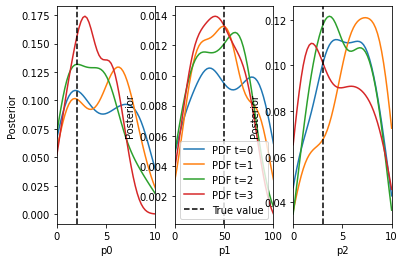

In [30]:
distance = pyabc.AdaptivePNormDistance()

abc = pyabc.ABCSMC(model, prior, distance)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

In [5]:
distance = pyabc.AdaptivePNormDistance(scale_function=pyabc.distance.root_mean_square_deviation)

abc = pyabc.ABCSMC(model, prior, distance)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=74, start_time=2021-02-27 00:23:58.038370>
INFO:ABC:Calibration sample t=-1.
INFO:History:Done <ABCSMC id=74, duration=0:00:00.241530, end_time=2021-02-27 00:23:58.279900>


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=82, start_time=2021-02-27 12:10:30.216277>
INFO:ABC:Calibration sample t=-1.


[   4 2500    5    5    5    5    5    5    5    5    5    5    5  150]


INFO:Epsilon:initial epsilon is 2.193171880775072
INFO:ABC:t: 0, eps: 2.193171880775072.


[[ 2.69187935e+00  2.57867537e-02 -5.83787967e-03  2.10864329e-02
  -2.13538969e-02 -4.89003773e-02  1.99824609e-02 -3.20081481e-02
   3.66088851e-02  3.53281429e-02  5.75516256e-02  1.45681862e-02
  -5.94681513e-02 -2.36176975e-02]
 [-4.72138133e-02  2.70722209e+01 -2.69141992e-01 -8.78828276e-02
   1.66346875e-01 -4.76842010e-01  3.85320587e-03  2.18292376e-01
  -1.28658774e-01  2.06802215e-01  1.10146515e-02  7.84058666e-02
  -2.25207306e-01  2.01790506e+00]
 [-1.65361919e-01 -2.11406161e+00  5.25179557e-02 -3.92488530e-02
  -1.01223803e-01  4.46123868e-02  3.47399388e-02 -1.59439530e-01
  -9.36205380e-02 -5.70513713e-02 -9.29699932e-02  2.03638498e-01
  -3.24055376e-03  3.33792388e+00]] [ 5.02551532 50.35689603  5.13648007]


INFO:ABC:Acceptance rate: 500 / 989 = 5.0556e-01, ESS=5.0000e+02.
INFO:ABC:t: 1, eps: 2.4572371227258514.
INFO:ABC:Acceptance rate: 500 / 1093 = 4.5746e-01, ESS=4.4897e+02.
INFO:ABC:t: 2, eps: 2.6167139395362247.
INFO:ABC:Acceptance rate: 500 / 1078 = 4.6382e-01, ESS=4.6038e+02.
INFO:ABC:t: 3, eps: 2.777307681432843.
INFO:ABC:Acceptance rate: 500 / 1155 = 4.3290e-01, ESS=4.3801e+02.
INFO:ABC:t: 4, eps: 3.007068730647756.
INFO:ABC:Acceptance rate: 500 / 1413 = 3.5386e-01, ESS=3.9794e+02.
INFO:ABC:t: 5, eps: 3.11617471684064.
INFO:ABC:Acceptance rate: 500 / 2202 = 2.2707e-01, ESS=3.0133e+02.
INFO:ABC:t: 6, eps: 3.1763424209570896.
INFO:ABC:Acceptance rate: 500 / 3886 = 1.2867e-01, ESS=2.6540e+02.
INFO:ABC:t: 7, eps: 3.215695419501435.
INFO:ABC:Acceptance rate: 500 / 5972 = 8.3724e-02, ESS=3.8014e+02.
INFO:pyabc.util:Stopping: minimum acceptance rate.
INFO:History:Done <ABCSMC id=82, duration=0:00:27.033559, end_time=2021-02-27 12:10:57.249836>


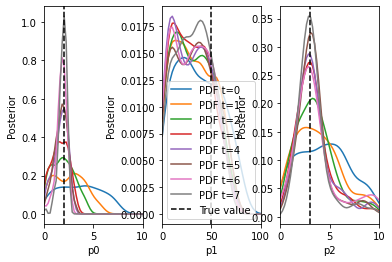

In [15]:
distance = pyabc.britney.AdaptiveEuclidean(pyabc.britney.LearnedLinearBritney(), adaptive=True)

abc = pyabc.ABCSMC(model, prior, distance, population_size=500)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=83, start_time=2021-02-27 12:11:06.978959>
INFO:ABC:Calibration sample t=-1.


[   4 2500    5    5    5    5    5    5    5    5    5    5    5  150]


INFO:Epsilon:initial epsilon is 2.2985938039053875
INFO:ABC:t: 0, eps: 2.2985938039053875.
INFO:ABC:Acceptance rate: 500 / 946 = 5.2854e-01, ESS=5.0000e+02.
INFO:ABC:t: 1, eps: 2.3944219097944117.
INFO:ABC:Acceptance rate: 500 / 1119 = 4.4683e-01, ESS=4.0270e+02.
INFO:ABC:t: 2, eps: 2.6967972264546782.
INFO:ABC:Acceptance rate: 500 / 1073 = 4.6598e-01, ESS=4.0487e+02.
INFO:ABC:t: 3, eps: 2.7776646590998086.
INFO:ABC:Acceptance rate: 500 / 1147 = 4.3592e-01, ESS=4.3460e+02.
INFO:ABC:t: 4, eps: 2.8876871208700754.
INFO:ABC:Acceptance rate: 500 / 1467 = 3.4083e-01, ESS=4.1225e+02.
INFO:ABC:t: 5, eps: 3.0512418924180413.
INFO:ABC:Acceptance rate: 500 / 1796 = 2.7840e-01, ESS=4.1743e+02.
INFO:ABC:t: 6, eps: 3.127701819475704.
INFO:ABC:Acceptance rate: 500 / 2792 = 1.7908e-01, ESS=3.5534e+02.
INFO:ABC:t: 7, eps: 3.0992068028237307.
INFO:ABC:Acceptance rate: 500 / 4354 = 1.1484e-01, ESS=3.5544e+02.
INFO:ABC:t: 8, eps: 3.1010280497533698.
INFO:ABC:Acceptance rate: 500 / 6918 = 7.2275e-02, ESS=

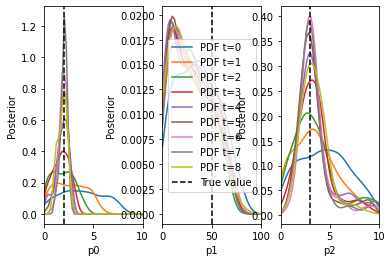

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gp_predictor = GaussianProcessRegressor(kernel=kernel)

distance = pyabc.britney.AdaptiveEuclidean(pyabc.britney.PredictorBritney(predictor=gp_predictor), adaptive=True)

abc = pyabc.ABCSMC(model, prior, distance, population_size=500)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pyabc



def model(p):
    return {'s0': p['p0'] + 0.5 * np.random.normal(),
            's1': p['p1'] + 50 * np.random.normal(),
            's2': 0.5 * np.random.normal()}

prior = pyabc.Distribution(p0=pyabc.RV('uniform', 0, 10),
                           p1=pyabc.RV('uniform', 0, 1000))

obs = {'s0': 4, 's1': 600, 's2': 5}

db_path = pyabc.create_sqlite_db_id(file_="ss.db")

def plot_history(history):
    fig, ax = plt.subplots(1,2)
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=10,
                                        x='p0', ax=ax[0],
                                        label="PDF t={}".format(t))
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=1000,
                                        x='p1', ax=ax[1],
                                        label="PDF t={}".format(t))
    ax[0].axvline(4, color='k', linestyle='dashed', label="True value")
    ax[1].axvline(6, color='k', linestyle='dashed', label="True value")
    ax[1].legend()

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=38, start_time=2021-02-26 18:28:30.639708>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 65475.18954516377
INFO:ABC:t: 0, eps: 65475.18954516377.
INFO:ABC:Acceptance rate: 100 / 198 = 5.0505e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 17735.8326666389.
INFO:ABC:Acceptance rate: 100 / 199 = 5.0251e-01, ESS=9.3857e+01.
INFO:ABC:t: 2, eps: 4597.364429516681.
INFO:ABC:Acceptance rate: 100 / 249 = 4.0161e-01, ESS=8.6270e+01.
INFO:ABC:t: 3, eps: 1166.8773529861498.
INFO:ABC:Acceptance rate: 100 / 276 = 3.6232e-01, ESS=6.2323e+01.
INFO:ABC:t: 4, eps: 215.48394529350963.
INFO:ABC:Acceptance rate: 100 / 764 = 1.3089e-01, ESS=8.0597e+01.
INFO:ABC:t: 5, eps: 79.63335320029186.
INFO:ABC:Acceptance rate: 100 / 1504 = 6.6489e-02, ESS=8.7591e+01.
INFO:pyabc.util:Stopping: minimum acceptance rate.
INFO:History:Done <ABCSMC id=38, duration=0:00:04.190736, end_time=2021-02-26 18:28:34.830444>


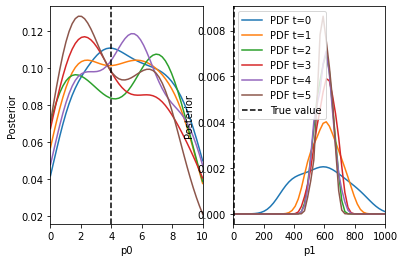

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

gp_predictor = GaussianProcessRegressor(kernel=kernel)
distance = pyabc.britney.Euclidean(pyabc.britney.IdentityBritney())

abc = pyabc.ABCSMC(model, prior, distance)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=41, start_time=2021-02-26 18:29:20.916755>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 77.17682561017125
INFO:ABC:t: 0, eps: 77.17682561017125.
INFO:ABC:Acceptance rate: 100 / 198 = 5.0505e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 209.84418532949152.
INFO:ABC:Acceptance rate: 100 / 487 = 2.0534e-01, ESS=9.0698e+01.
INFO:ABC:t: 2, eps: 364.8798836675619.
INFO:ABC:Acceptance rate: 100 / 895 = 1.1173e-01, ESS=8.3836e+01.
INFO:ABC:t: 3, eps: 620.743254010089.
INFO:ABC:Acceptance rate: 100 / 1728 = 5.7870e-02, ESS=8.6618e+01.
INFO:pyabc.util:Stopping: minimum acceptance rate.
INFO:History:Done <ABCSMC id=41, duration=0:00:03.306741, end_time=2021-02-26 18:29:24.223496>


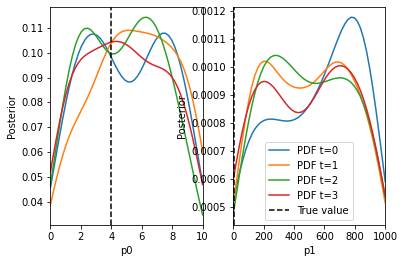

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

gp_predictor = GaussianProcessRegressor(kernel=kernel)
distance = pyabc.britney.AdaptiveEuclidean(pyabc.britney.IdentityBritney(), adaptive=True, scale_function=pyabc.britney.scale.standard_deviation)

abc = pyabc.ABCSMC(model, prior, distance)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=33, start_time=2021-02-26 16:12:28.635896>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 56737.10695785267
INFO:ABC:t: 0, eps: 56737.10695785267.
INFO:ABC:Acceptance rate: 100 / 224 = 4.4643e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 15991.029703835275.
INFO:ABC:Acceptance rate: 100 / 218 = 4.5872e-01, ESS=9.2563e+01.
INFO:ABC:t: 2, eps: 4337.616833327363.
INFO:ABC:Acceptance rate: 100 / 259 = 3.8610e-01, ESS=8.4864e+01.
INFO:ABC:t: 3, eps: 1164.1500887701243.
INFO:ABC:Acceptance rate: 100 / 252 = 3.9683e-01, ESS=8.9116e+01.
INFO:ABC:t: 4, eps: 242.1992886781747.
INFO:ABC:Acceptance rate: 100 / 566 = 1.7668e-01, ESS=1.1154e+01.
INFO:ABC:t: 5, eps: 20.78796979197377.
INFO:ABC:Acceptance rate: 100 / 2134 = 4.6860e-02, ESS=8.8845e+01.
INFO:pyabc.util:Stopping: minimum acceptance rate.
INFO:History:Done <ABCSMC id=33, duration=0:00:05.316483, end_time=2021-02-26 16:12:33.952379>


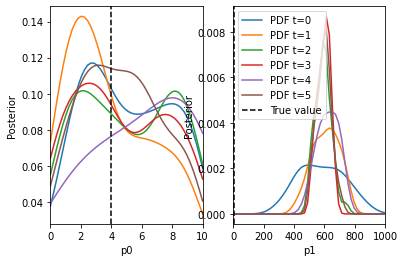

In [38]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

gp_predictor = GaussianProcessRegressor(kernel=kernel)
distance = pyabc.britney.Euclidean(pyabc.britney.PredictorBritney(predictor=gp_predictor,))

abc = pyabc.ABCSMC(model, prior, distance)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=34, start_time=2021-02-26 16:12:38.306837>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 2.4410171297649415
INFO:ABC:t: 0, eps: 2.4410171297649415.
INFO:ABC:Acceptance rate: 100 / 218 = 4.5872e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.114775119353499.
INFO:ABC:Acceptance rate: 100 / 210 = 4.7619e-01, ESS=9.6153e+01.
INFO:ABC:t: 2, eps: 0.5407907455041345.
INFO:ABC:Acceptance rate: 100 / 221 = 4.5249e-01, ESS=9.6813e+01.
INFO:ABC:t: 3, eps: 0.2513877730504978.
INFO:ABC:Acceptance rate: 100 / 274 = 3.6496e-01, ESS=8.1488e+01.
INFO:ABC:t: 4, eps: 0.1219408119803251.
INFO:ABC:Acceptance rate: 100 / 425 = 2.3529e-01, ESS=8.5556e+01.
INFO:ABC:t: 5, eps: 0.06085037508281662.
INFO:ABC:Acceptance rate: 100 / 523 = 1.9120e-01, ESS=9.0771e+01.
INFO:ABC:t: 6, eps: 0.03287073315631476.
INFO:ABC:Acceptance rate: 100 / 735 = 1.3605e-01, ESS=7.9961e+01.
INFO:ABC:t: 7, eps: 0.017172389801233652.
INFO:

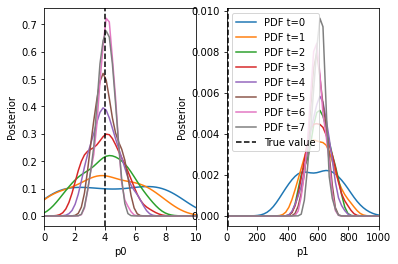

In [39]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

gp_predictor = GaussianProcessRegressor(kernel=kernel)
distance = pyabc.britney.AdaptiveEuclidean(pyabc.britney.PredictorBritney(predictor=gp_predictor,))

abc = pyabc.ABCSMC(model, prior, distance)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=35, start_time=2021-02-26 16:12:56.236536>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 3.265407971806438
INFO:ABC:t: 0, eps: 3.265407971806438.
INFO:ABC:Acceptance rate: 100 / 230 = 4.3478e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.8676336932062583.
INFO:ABC:Acceptance rate: 100 / 205 = 4.8780e-01, ESS=9.0213e+01.
INFO:ABC:t: 2, eps: 2.655672248830534.
INFO:ABC:Acceptance rate: 100 / 258 = 3.8760e-01, ESS=8.9798e+01.
INFO:ABC:t: 3, eps: 2.561531379973477.
INFO:ABC:Acceptance rate: 100 / 243 = 4.1152e-01, ESS=5.2915e+01.
INFO:ABC:t: 4, eps: 3.0775898073197303.
INFO:ABC:Acceptance rate: 100 / 309 = 3.2362e-01, ESS=8.7925e+01.
INFO:ABC:t: 5, eps: 2.2887533037768235.
INFO:ABC:Acceptance rate: 100 / 434 = 2.3041e-01, ESS=8.8032e+01.
INFO:ABC:t: 6, eps: 1.801797161509862.
INFO:ABC:Acceptance rate: 100 / 707 = 1.4144e-01, ESS=6.3880e+01.
INFO:ABC:t: 7, eps: 2.127525918527933.
INFO:ABC:Accep

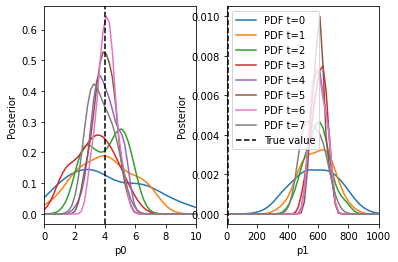

In [40]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

gp_predictor = GaussianProcessRegressor(kernel=kernel)
distance = pyabc.britney.Euclidean(pyabc.britney.PredictorBritney(predictor=gp_predictor,))
distance = pyabc.britney.AdaptiveEuclidean(pyabc.britney.PredictorBritney(predictor=gp_predictor,), adaptive=True)

abc = pyabc.ABCSMC(model, prior, distance)
abc.new(db_path, obs)
h = abc.run(min_acceptance_rate=1e-1)

plot_history(h)